In [1]:
#import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#assign path
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 4\Instacart Basket Analysis'

In [5]:
#import ords_prods_customers dataset, now without low-activity customers
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

Continued from Part 1.

### Create profiling variables for customers based on age-group, income-level, family status and number of dependents.
#### We will determine the influence of these variables on product choice, time and day of order, expenditure and order frequency. 

#### Creating age-group variable for customer data. 

The ages will be divided into 4 groups: Young Adult (under 25), Adult (25-39), Mature Adult (40-64) and Senior (65+)

In [6]:
#create for-loop that assigns age group categories
result = []
for value in ords_prods_customers["age"]:
  if value < 25:
    result.append("young_adult")
  elif value >= 25 and value < 40:
    result.append("adult")
  elif value >= 40 and value < 65:
    result.append("mature_adult")
  else:
    result.append("senior")

In [7]:
#create new column for age group based on results of for-loop
ords_prods_customers['age_group'] = result

In [159]:
#check value counts for age group column
ords_prods_customers['age_group'].value_counts()

age_group
mature_adult    12101980
senior           8194267
adult            7248839
young_adult      3414601
Name: count, dtype: int64

Text(0.5, 1.0, 'Age-Group Distribution of Customers')

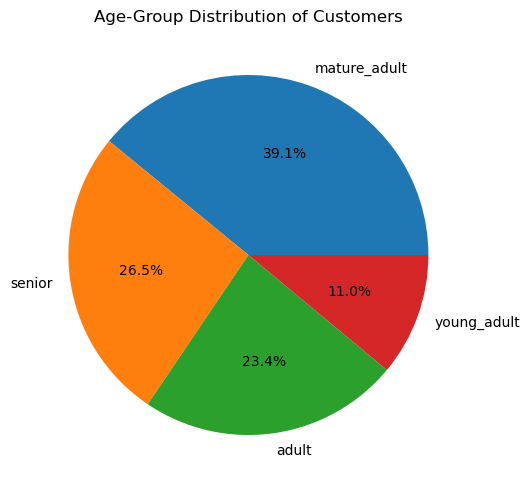

In [160]:
#visualize age-group distribution among customers
pie_agegroup = ords_prods_customers['age_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.title('Age-Group Distribution of Customers')

In [161]:
#saving bar chart as image
pie_agegroup.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_agegroup.png'))

#### Creating income-level variable for customers
The income-levels can be divided into 3 categories: Low Income (under 50,000), Middle Income (50,000-99,999) and High Income (100,000 and over).

In [8]:
#creating for-loop assigning income-level to customers
result2 = []
for value in ords_prods_customers["income"]:
  if value < 50000:
    result2.append("low_income")
  elif value >= 50000 and value < 100000:
    result2.append("middle_income")
  else:
    result2.append("high_income")

In [9]:
#creating new column for income-level
ords_prods_customers['income_level'] = result2

In [165]:
ords_prods_customers['income_level'].value_counts()

income_level
high_income      14202788
middle_income    13394345
low_income        3362554
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'high_income'),
  Text(1, 0, 'middle_income'),
  Text(2, 0, 'low_income')])

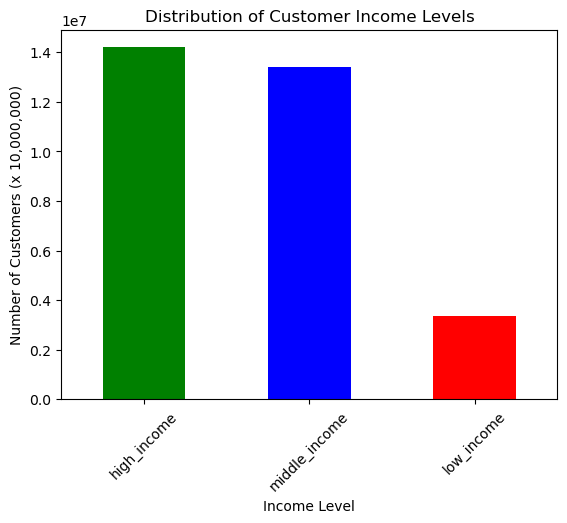

In [166]:
#visualizing distribution of income-levels among customers
bar_income = ords_prods_customers['income_level'].value_counts().plot.bar(color=['green', 'blue', 'red'])
plt.title('Distribution of Customer Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Number of Customers (x 10,000,000)')
plt.xticks(rotation=45)

In [167]:
#saving bar chart as image
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

#### Family Status
We already have a column for family-status of customers, therefore it is not necessary to create a new variable.

Text(0.5, 1.0, 'Family Status of Customers')

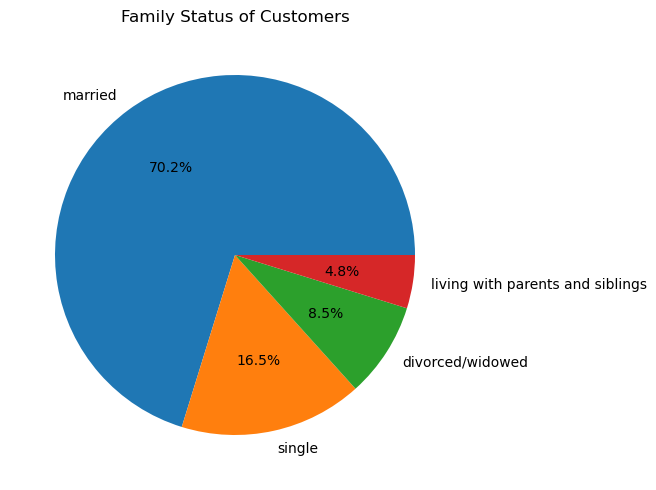

In [169]:
#visualizing family status distribution of customers
pie_famstatus = ords_prods_customers['fam_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.title('Family Status of Customers')

In [170]:
pie_famstatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_famstatus.png'))

#### Importing and joining information about product department names

In [172]:
#we will need the names of the departments corresponding to each department_id value. 
#for this, we will need to import and join the departments dataset to our main dataset

In [10]:
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [174]:
df_deps.head()

,Unnamed: 0,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol


In [11]:
#dropping unnecessary column
df_deps.drop(columns = ['Unnamed: 0'], inplace=True)

In [176]:
df_deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [177]:
ords_prods_customers.dtypes

order_id                        int64
user_id                         int64
order_number                    int64
orders_day_of_week              int64
order_hour_of_day               int64
days_since_prior_order        float64
product_id                      int64
add_to_cart_order               int64
reordered                       int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
price_range_loc                object
busiest_day                    object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
avg_prod_price                float64
spending_flag                  object
avg_days_since_prior_order    float64
orderfreq_flag                 object
first_name                     object
surname                        object
gender                         object
state       

In [19]:
#merging the two datasets
instacart_complete_df = ords_prods_customers.merge(df_deps, on='department_id', indicator=True)

In [21]:
#we need another flag indicating whether or not a customer has dependents
instacart_complete_df.loc[instacart_complete_df['number_of_dependents'] == 0, 'no_dependents_flag'] = True
instacart_complete_df.loc[instacart_complete_df['number_of_dependents'] != 0, 'no_dependents_flag'] = False

In [ ]:
#check for no_dependents_flag
instacart_complete_df['no_dependents_flag'].value_counts()

In [ ]:
#visualize the distribution of customers with or without dependents
pie_dependents = instacart_complete_df['no_dependents_flag'].value_counts().plot.pie(autopct='%1.1f%%', labels=['With Dependents', 'No Dependents'])
plt.ylabel('')
plt.title('Percentage of Customers With and Without Dependents')

In [ ]:
#save visualization as image
pie_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_dependents.png'))

##### Extract sample from instacart complete dataset to be used in line-charts

In [ ]:
np.random.seed(4)
dev = np.random.rand(len(instacart_complete_df)) <=0.7
big = instacart_complete_df[dev]
small = instacart_complete_df[~dev]

#### Age Group and Order Habits

##### Choice of Goods Ordered

In [ ]:
#create a crosstab showing age group and department of products ordered
crosstab_age_depts = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['department'], dropna = False)

In [ ]:
crosstab_age_depts = crosstab_age_depts.T

In [ ]:
#visualize this relationship with a bar chart
#so far it appears that mature adults are the largest age group represented in all departments, while young adults are the smallest.
#we can also see that produce is the most-ordered department among all age groups and bulk is the least-ordered.

In [ ]:
age_depts_chart = crosstab_age_depts.plot.bar(figsize=(14,8))
plt.title('Ordering Habits of Customer Age Groups by Department')
plt.legend(title='Age Group')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=67.5, fontsize=8)
plt.show()
age_depts_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_depts_fixed.png'))

##### Time and Day of Order

In [ ]:
#create a crosstab between order hour of day and age group
crosstab_age_ordertime = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['order_hour_of_day'], dropna = False)

In [ ]:
crosstab_age_ordertime = crosstab_age_ordertime.T

In [ ]:
#visualize with a bar chart
bar_age_ordertime = crosstab_age_ordertime.plot.bar(stacked=True)
plt.title('Ordering Hours by Customer Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
bar_age_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_ordertime.png'))

In [ ]:
#create a crosstab for order day of week and age group
crosstab_age_orderday = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['orders_day_of_week'], dropna = False)

In [ ]:
crosstab_age_orderday = crosstab_age_orderday.T

In [ ]:
bar_age_orderday = crosstab_age_orderday.plot.bar()
plt.title('Order Days of the Week by Customer Age Group')
plt.xlabel('Day of Week (0 = Saturday)')
plt.ylabel('Number of Orders (x 1,000,000)')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
bar_age_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_orderday.png'))

##### Daily and Weekly Expenditure

In [ ]:
#subset for line charts
df_age_spending = small[['age_group', 'order_hour_of_day', 'orders_day_of_week', 'prices']]

In [ ]:
#spending throughout the day
line_agegroup_dailyspend = sns.lineplot(data=df_age_spending, x='order_hour_of_day', y='prices', hue='age_group')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_agegroup_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_agegroup_dailyspend.png'))

In [ ]:
#spending throughout the week
line_agegroup_weeklyspend = sns.lineplot(data=df_age_spending, x='orders_day_of_week', y='prices', hue='age_group')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Amount Spent')
line_agegroup_weeklyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_agegroup_weeklyspend.png'))

##### Order Frequency

In [ ]:
crosstab_age_orderfreq = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['orderfreq_flag'], dropna = False)

In [ ]:
bar_age_orderfreq = crosstab_age_orderfreq.plot.bar()
plt.title('Order Frequency by Age Group')
plt.legend(title='')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers (x 1,000,000)')
bar_age_orderfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_orderfreq.png'))

#### Income Level and Order Habits

##### Choice of Goods Ordered

In [ ]:
#create a crosstab for income level and department of products ordered
crosstab_income_dept = pd.crosstab(instacart_complete_df['income_level'], instacart_complete_df['department'], dropna = False)

In [ ]:
crosstab_income_dept = crosstab_income_dept.T

In [ ]:
income_dept_chart = crosstab_income_dept.plot.bar(figsize=(14,8))
plt.title('Choice of Product Departments by Income Level')
plt.legend(title='Income Level')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=67.5)
income_dept_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_depts.png'))

##### Time and Day of Order

In [ ]:
#create a crosstab for income level and order hour of day
crosstab_income_ordertime = pd.crosstab(instacart_complete_df['income_level'], instacart_complete_df['order_hour_of_day'], dropna = False)

In [ ]:
crosstab_income_ordertime = crosstab_income_ordertime.T

In [ ]:
#create a stacked bar chart showing the distribution of orders by hour of day
bar_income_ordertime = crosstab_income_ordertime.plot.barh(stacked=True)
plt.title('Order Times by Income Level')
plt.legend(title='Income Level')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Orders (x 1,000,000)')
bar_income_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_ordertime.png'))

In [ ]:
#create a crosstab for income level and order day of week
crosstab_income_orderday = pd.crosstab(instacart_complete_df['income_level'], instacart_complete_df['orders_day_of_week'], dropna = False)

In [ ]:
crosstab_income_orderday = crosstab_income_orderday.T

In [ ]:
#visualize results in stacked bar chart
bar_income_orderday = crosstab_income_orderday.plot.bar()
plt.title('Order Days of the Week  by Income Level')
plt.xlabel('Day of Week (0 = Saturday)')
plt.ylabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=0)
plt.legend(title='Income Level')
bar_income_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_orderday.png'))

##### Daily and Weekly Expenditure

In [ ]:
#create subset to use in line-charts
df_incomelevel_spending = small[['income_level', 'prices', 'order_hour_of_day', 'orders_day_of_week']]

In [ ]:
#spending throughout the day
line_incomelevel_dailyspend = sns.lineplot(data=df_incomelevel_spending, x='order_hour_of_day', y='prices', hue='income_level')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_incomelevel_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_incomelevel_dailyspend.png'))

In [ ]:
#spending throughout the week
line_incomelevel_weeklyspend = sns.lineplot(data=df_incomelevel_spending, x='orders_day_of_week', y='prices', hue='income_level')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Amount Spent')
line_incomelevel_weeklyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_incomelevel_weeklyspend.png'))

##### Order Frequency

In [ ]:
#create a crosstab for order frequency and income level
crosstab_income_orderfreq = pd.crosstab(instacart_complete_df['income_level'], instacart_complete_df['orderfreq_flag'], dropna = False)

In [ ]:
bar_income_orderfreq = crosstab_income_orderfreq.plot.bar()
plt.title('Order Frequency by Income Level')
plt.xticks(rotation=45)
plt.xlabel('Income Level')
plt.ylabel('Number of Customers (x 10,000,000)')
plt.legend(title='')
bar_income_orderfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_orderfreq.png'))

#### Family Status

In [ ]:
#relationship between family status and department of products ordered
crosstab_famstatus_depts = pd.crosstab(instacart_complete_df['fam_status'], instacart_complete_df['department'], dropna = False)

In [ ]:
crosstab_famstatus_depts = crosstab_famstatus_depts.T

In [ ]:
bar_famstatus_depts = crosstab_famstatus_depts.plot.bar(figsize=(14,8))
plt.title('Customer Order Department Choice by Family Status')
plt.legend(title='Family Status')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=67.5)
bar_famstatus_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstatus_depts.png'))

##### Time and Day of Order

In [ ]:
#create a crosstab for family status and order hour of day, as well as another for family status and order day of week
crosstab_famstatus_ordertime = pd.crosstab(instacart_complete_df['fam_status'], instacart_complete_df['order_hour_of_day'], dropna = False)

In [ ]:
crosstab_famstatus_ordertime = crosstab_famstatus_ordertime.T

In [ ]:
bar_famstatus_ordertime = crosstab_famstatus_ordertime.plot.barh(stacked=True)
plt.title('Order Time of Day by Customer Family Status')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.ylabel('Order Hour of Day')
plt.legend(title='Family Status')
bar_famstatus_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstatus_ordertime.png'))

In [ ]:
crosstab_famstatus_orderday = pd.crosstab(instacart_complete_df['fam_status'], instacart_complete_df['orders_day_of_week'], dropna = False)

In [ ]:
crosstab_famstatus_orderday = crosstab_famstatus_orderday.T

In [ ]:
bar_famstatus_orderday = crosstab_famstatus_orderday.plot.bar()
plt.title('Order Day of Week by Customer Family Status')
plt.xticks(rotation=0)
plt.xlabel('Day of Week (0 = Saturday)')
plt.ylabel('Number of Orders (x 1,000,000)')
plt.legend(title='Family Status')
bar_famstatus_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstatus_orderday.png'))

##### Daily and Weekly Expenditure

In [ ]:
#create subset to use for line-charts
df_famstatus_spending = small[['fam_status', 'prices', 'order_hour_of_day', 'orders_day_of_week']]

In [ ]:
#spending throughout the day
line_famstatus_dailyspend = sns.lineplot(data=df_famstatus_spending, x='order_hour_of_day', y='prices', hue='fam_status')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_famstatus_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_famstatus_dailyspend.png'))

In [ ]:
#spending throughout the week
line_famstatus_weeklyspend = sns.lineplot(data=df_famstatus_spending, x='orders_day_of_week', y='prices', hue='fam_status')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Amount Spent')
line_famstatus_weeklyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_famstatus_weeklyspend.png'))

##### Order Frequency

In [ ]:
#create a crosstab for fam_status and orderfreq_flag
crosstab_famstatus_orderfreq = pd.crosstab(instacart_complete_df['fam_status'], instacart_complete_df['orderfreq_flag'], dropna = False)

In [ ]:
bar_famstatus_orderfreq = crosstab_famstatus_orderfreq.plot.bar()
plt.title('Order Frequency by Family Status')
plt.legend(title='')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers (x 10,000,000)')
plt.xticks(rotation=45)
bar_famstatus_orderfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstatus_orderfreq.png'))

#### Number of Dependents

In [ ]:
instacart_complete_df['number_of_dependents'].describe()

In [ ]:
#the maximum number of dependents is only 3, therefore it may not be necessary to use the no_dependents flag column in this case
instacart_complete_df['number_of_dependents'].value_counts()

In [ ]:
#we can visualize the distribution of customer dependents as a pie chart
pie_count_dependents = instacart_complete_df['number_of_dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Number of Dependents per Customer')

In [ ]:
pie_count_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_count_dependents.png'))

##### Departments of Products Ordered

In [ ]:
#create a crosstab for number of dependents and departments of products ordered
crosstab_dependents_depts = pd.crosstab(instacart_complete_df['number_of_dependents'], instacart_complete_df['department'], dropna = False)

In [ ]:
crosstab_dependents_depts = crosstab_dependents_depts.T

In [ ]:
bar_dependents_depts = crosstab_dependents_depts.plot.bar(figsize=(14,8))
plt.title('Choice of Product Department by Number of Dependents')
plt.legend(title='Number of Customer Dependents')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.xticks(rotation=67.5)
bar_dependents_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependents_depts.png'))

##### Order Time and Day

In [ ]:
#create a crosstab for number of dependents and order hour of day, visualize results
crosstab_dependents_ordertime = pd.crosstab(instacart_complete_df['number_of_dependents'], instacart_complete_df['order_hour_of_day'], dropna = False)

In [ ]:
crosstab_dependents_ordertime = crosstab_dependents_ordertime.T

In [ ]:
bar_dependents_ordertime = crosstab_dependents_ordertime.plot.barh(stacked=True)
plt.title('Time of Order and Number of Customer Dependents')
plt.xlabel('Number of Orders (x 1,000,000)')
plt.ylabel('Hour of Day')
plt.legend(title='Number of Dependents')
bar_dependents_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependents_ordertime.png'))

In [ ]:
#create crosstab for number of dependents and order day of week, visualize with bar chart
crosstab_dependents_orderday = pd.crosstab(instacart_complete_df['number_of_dependents'], instacart_complete_df['orders_day_of_week'], dropna = False)

In [ ]:
crosstab_dependents_orderday = crosstab_dependents_orderday.T

In [ ]:
bar_dependents_orderday = crosstab_dependents_orderday.plot.bar()
plt.title('Order Day of Week and Number of Customer Dependents')
plt.legend(title='Number of Dependents')
plt.xlabel('Day of Week (0 = Saturday)')
plt.ylabel('Number of Orders (x 1,000,000)')
bar_dependents_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependents_orderday.png'))

##### Daily and Weekly Expenditure

In [ ]:
#create subset to use in line-charts
df_dependents_spending = small[['number_of_dependents', 'prices', 'order_hour_of_day', 'orders_day_of_week']]

In [ ]:
#spending throughout the day
line_dependents_dailyspend = sns.lineplot(data=df_dependents_spending, x='order_hour_of_day', y='prices', hue='number_of_dependents')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_dependents_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_dailyspend.png'))

In [ ]:
#spending throughout the week
line_dependents_weeklyspend = sns.lineplot(data=df_dependents_spending, x='orders_day_of_week', y='prices', hue='number_of_dependents')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Amount Spent')
line_dependents_weeklyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents_weeklyspend.png'))

#### Order Frequency

In [ ]:
crosstab_dependents_orderfreq = pd.crosstab(instacart_complete_df['number_of_dependents'], instacart_complete_df['orderfreq_flag'], dropna=False)

In [ ]:
bar_dependents_orderfreq = crosstab_dependents_orderfreq.plot.bar()
plt.title('Order Frequency by Number of Dependents')
plt.legend(title='', fontsize=7)
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Customers (x 10,000,000)')
plt.xticks(rotation=0)
bar_dependents_orderfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependents_orderfreq.png'))

### Minimum, Maximum and Mean Values of Customer Profiles for Expenditure and Usage Frequency

#### Aggregate the minimum, maximum and mean values of expenditure (prices) and order frequency (days_since_prior_order) for each customer profile variable

In [ ]:
#subset for aggregating data
customer_profiles = instacart_complete_df.groupby(['user_id', 'age_group', 'income_level', 'fam_status', 'number_of_dependents', 'days_since_prior_order','spending_flag', 'orderfreq_flag'])['prices'].sum().reset_index()

#### Age-Group

##### Expenditure

In [ ]:
agegroup_expenditure_agg = customer_profiles.groupby('age_group').agg({'prices':['min', 'max', 'mean']})

In [ ]:
agegroup_expenditure_agg

##### Order Frequency

In [ ]:
agegroup_orderfreq_agg = customer_profiles.groupby('age_group').agg({'days_since_prior_order':['min','max','mean']})

In [ ]:
agegroup_orderfreq_agg

#### Income Level

##### Expenditure

In [ ]:
income_expenditure_agg = customer_profiles.groupby('income_level').agg({'prices':['min', 'max', 'mean']})

In [ ]:
income_expenditure_agg

##### Order Frequency

In [ ]:
income_orderfreq_agg = customer_profiles.groupby('income_level').agg({'days_since_prior_order':['min', 'max','mean']})

In [ ]:
income_orderfreq_agg

#### Family Status

##### Expenditure

In [ ]:
famstatus_expenditure_agg = customer_profiles.groupby('fam_status').agg({'prices':['min', 'max', 'mean']})

In [ ]:
famstatus_expenditure_agg

##### Order Frequency

In [ ]:
famstatus_orderfreq_agg = customer_profiles.groupby('fam_status').agg({'days_since_prior_order':['min', 'max', 'mean']})

In [ ]:
famstatus_orderfreq_agg

#### Number of Dependents

##### Expenditure

In [ ]:
dependents_expenditure_agg = customer_profiles.groupby('number_of_dependents').agg({'prices':['min', 'max', 'mean']})

In [ ]:
dependents_expenditure_agg

##### Order Frequency

In [ ]:
dependents_orderfreq_agg = customer_profiles.groupby('number_of_dependents').agg({'days_since_prior_order':['min', 'max', 'mean']})

In [ ]:
dependents_orderfreq_agg

### Regional Distribution of Customer Profiles

#### Distribution of Customers by Region

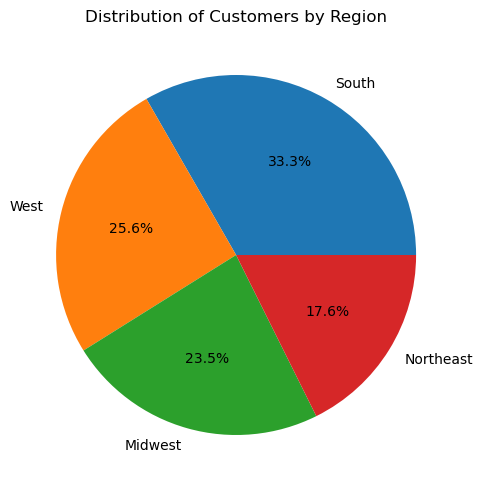

In [33]:
pie_region = instacart_complete_df['region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.title('Distribution of Customers by Region')
pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region.png'))

##### Age-Groups

In [ ]:
crosstab_region_agegroup = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['region'], dropna = False)

In [ ]:
bar_region_agegroup = crosstab_region_agegroup.plot.bar()
plt.title('Distribution of Customer Age Groups within each Region')
plt.legend(title='Region', fontsize=7)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers (x 1,000,000)')
bar_region_agegroup.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_agegroup.png'))

In [ ]:
crosstab_region_agegroup = crosstab_region_agegroup.T

In [ ]:
crosstab_region_agegroup.to_clipboard()
#copy to excel for further analysis

In [ ]:
bar_region_agegroup = crosstab_region_agegroup.plot.bar()
plt.title('Distribution of Customer Age Groups by Region')
plt.legend(title='Age Group', fontsize=7)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Customers (x 1,000,000)')
bar_region_agegroup.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_agegroup_transposed.png'))

#### Income Level

In [ ]:
crosstab_region_income = pd.crosstab(instacart_complete_df['region'], instacart_complete_df['income_level'], dropna = False)

In [ ]:
crosstab_region_income.to_clipboard()
#copy to excel for further analysis

In [ ]:
bar_region_income = crosstab_region_income.plot.bar()
plt.title('Distribution of Customer Income Levels by Region')
plt.legend(title='Income Level', fontsize=7)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Customers (x 1,000,000)')
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

#### Family Status

In [ ]:
crosstab_region_famstatus = pd.crosstab(instacart_complete_df['region'], instacart_complete_df['fam_status'], dropna=False)

In [ ]:
crosstab_region_famstatus.to_clipboard()
#copy to excel for further analysis

In [ ]:
bar_region_famstatus = crosstab_region_famstatus.plot.bar()
plt.title('Distribution of Customer Family Status by Region')
plt.legend(title='Family Status', fontsize=7)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Customers (x 1,000,000)')
bar_region_famstatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_famstatus.png'))

#### Number of Dependents

In [ ]:
crosstab_region_dependents = pd.crosstab(instacart_complete_df['region'], instacart_complete_df['number_of_dependents'], dropna=False)

In [ ]:
crosstab_region_dependents.to_clipboard()
#copy to excel for further analysis

In [ ]:
bar_region_dependents = crosstab_region_dependents.plot.bar()
plt.title('Number of Dependents per Customer, by Region')
plt.legend(title='Number of Dependents', fontsize=7)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Customers (x 1,000,000)')

In [ ]:
bar_region_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_dependents.png'))

#### Department Choices by Region

In [ ]:
df_deps_region = small[['region', 'department', 'prices']]

In [ ]:
plt.figure(figsize=(12,6))
line_deps_region_count = sns.lineplot(data=pd.crosstab(df_deps_region['department'], df_deps_region['region'], dropna=False))
plt.xticks(rotation=67.5, fontsize=9)
plt.show()

In [ ]:
line_deps_region_count.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_deps_region_ordercount.png'))

##### Order Hour of Day by Region

In [ ]:
#using same sample as previous line chart to create subset with necessary columns
df_region_orderhabits = small[['region', 'order_hour_of_day', 'orders_day_of_week', 'prices']]

In [ ]:
#order hour of day
line_region_orderhour = sns.lineplot(data=pd.crosstab(df_region_orderhabits['order_hour_of_day'], df_deps_region['region'], dropna=False))
plt.xlabel('Hour of Day')
line_region_orderhour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_orderhour.png'))

In [ ]:
#order day of week
line_region_orderday = sns.lineplot(data=pd.crosstab(df_region_orderhabits['orders_day_of_week'], df_deps_region['region'], dropna=False))
plt.xlabel('Day of the Week (Saturday = 0)')
line_region_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_orderday.png'))

In [ ]:
#spending by hour
line_region_hourspend = sns.lineplot(data=df_region_orderhabits, x='order_hour_of_day', y='prices', hue='region')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_region_hourspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_hourspend.png'))

In [ ]:
#spending by day
line_region_dailyspend = sns.lineplot(data=df_region_orderhabits, x='orders_day_of_week', y='prices', hue='region')
plt.xlabel('Day of the Week (Saturday = 0)')
plt.ylabel('Amount Spent')
line_region_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_dailyspend.png'))

### Observations and Insights
##### The highest number of orders across all customer profiles are from the Produce department, followed by Dairy/Eggs.
##### All regions follow the same pattern in their choice of order departments. The greatest variations can be seen in the Beverages, Dairy/Eggs, Frozen and Produce departments.
##### The largest customer age group are mature adults (aged 40-64).
##### The majority of customers are married. Approximately 25% of customers have no dependents while the distribution of customers with 1, 2 or 3 dependents is almost equal.
##### The majority of customers earn medium or high-level incomes. 
##### Order hour and day largely follow similar patterns across customer profiles, with the busiest times and days being, respectively, midday and weekends.
##### Frequent customers make up the majority of total customers.
##### The number of low-spending customers is much higher than high-spending ones across all profiles.
##### The South region contains the largest number of customers.

In [ ]:
#exporting updated dataframe
instacart_complete_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_complete_df.pkl'))

### Additional Visuals to Answer Key Questions

In [ ]:
instacart_complete_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_complete_df.pkl'))

Busiest Hours and Days

In [ ]:
#busiest hour
hist_ordertime = instacart_complete_df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Frequency of Orders in a Day')
plt.xlabel('Hour of Day')
plt.ylabel('Order Frequency')
hist_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ordertime.png'))

In [ ]:
#busiest days of the week
hist_orderday = instacart_complete_df['orders_day_of_week'].plot.hist(bins = 7)
plt.title('Frequency of Orders by Day in a Week')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Order Frequency')
hist_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orderday.png'))

##### Most Popular Departments Overall

In [ ]:
#departments
bar_departments = instacart_complete_df['department'].value_counts().plot.barh(color=['red','red','red','orange','orange','orange','orange','yellow','yellow','yellow','yellow','yellow','yellow','yellow','green','green','green','green','green','green'])
plt.title('Order Department Choices')
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

##### Customer Loyalty and Ordering Habits

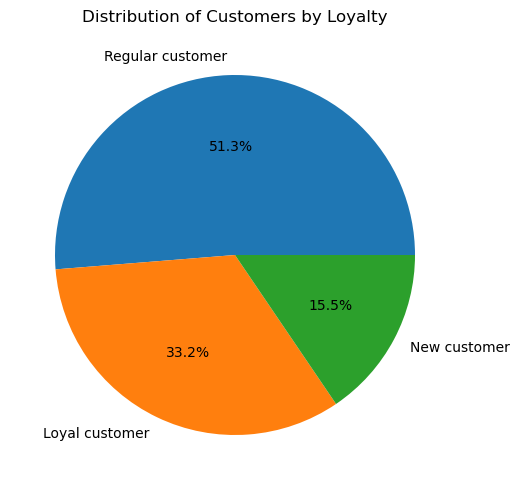

In [30]:
#distribution of users by brand loyalty
pie_loyalty = instacart_complete_df['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()
plt.title('Distribution of Customers by Loyalty')
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

In [ ]:
#create a subset for each loyalty category
df_newcustomer = instacart_complete_df[instacart_complete_df['loyalty_flag'] == 'New customer']
df_regcustomer = instacart_complete_df[instacart_complete_df['loyalty_flag']=='Regular customer']
df_loyalcustomer = instacart_complete_df[instacart_complete_df['loyalty_flag']=='Loyal customer']

##### Departments

In [ ]:
#new customer department choices
bar_newcustomer_prods = df_newcustomer['department'].value_counts().plot.barh()
bar_newcustomer_prods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_newcustomer_prods.png'))

In [ ]:
#regular customers
bar_regcustomer_prods = df_regcustomer['department'].value_counts().plot.barh()
bar_regcustomer_prods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regcustomer_prods.png'))

In [ ]:
#loyal customers
bar_loyalcustomer_prods = df_loyalcustomer['department'].value_counts().plot.barh()
bar_loyalcustomer_prods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalcustomer_prods.png'))

Order Time and Day

In [ ]:
#using sample from previous linechart, create a subset for loyalty flag and order hour/day
df_loyalty_orderhour_orderday = small[['loyalty_flag', 'order_hour_of_day', 'orders_day_of_week', 'prices']]

In [ ]:
line_loyalty_ordertime = sns.lineplot(data=pd.crosstab(df_loyalty_orderhour_orderday['order_hour_of_day'], df_loyalty_orderhour_orderday['loyalty_flag'], dropna=False))
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
line_loyalty_ordertime.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_ordertime.png'))

In [ ]:
line_loyalty_orderday = sns.lineplot(data=pd.crosstab(df_loyalty_orderhour_orderday['orders_day_of_week'], df_loyalty_orderhour_orderday['loyalty_flag'], dropna=False))
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Order Count')
line_loyalty_orderday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_orderday.png'))

In [ ]:
#spending throughout the day
line_loyalty_dailyspend = sns.lineplot(data=df_loyalty_orderhour_orderday, x='order_hour_of_day', y='prices', hue='loyalty_flag')
plt.xlabel('Hour of Day')
plt.ylabel('Amount Spent')
line_loyalty_dailyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_dailyspend.png'))

In [ ]:
#spending throughout the week
line_loyalty_weeklyspend = sns.lineplot(data=df_loyalty_orderhour_orderday, x='orders_day_of_week', y='prices', hue='loyalty_flag')
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Amount Spent')
line_loyalty_weeklyspend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_weeklyspend.png'))

##### Distribution of Price Labels

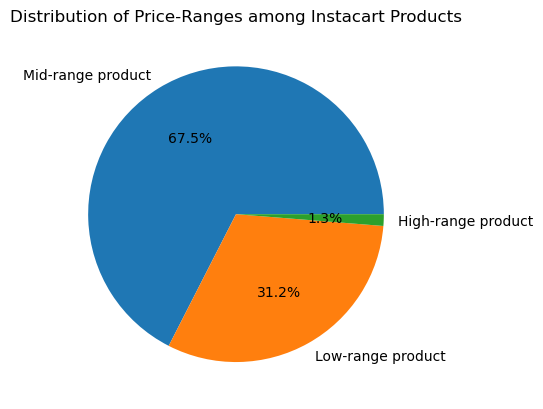

In [28]:
pie_price_labels = instacart_complete_df['price_range_loc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Price-Ranges among Instacart Products')
pie_price_labels.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_labels.png'))

In [37]:
crosstab_age_famstatus = pd.crosstab(instacart_complete_df['age_group'], instacart_complete_df['fam_status'], dropna=False)

In [43]:
#visualizing relationship between age groups and family status

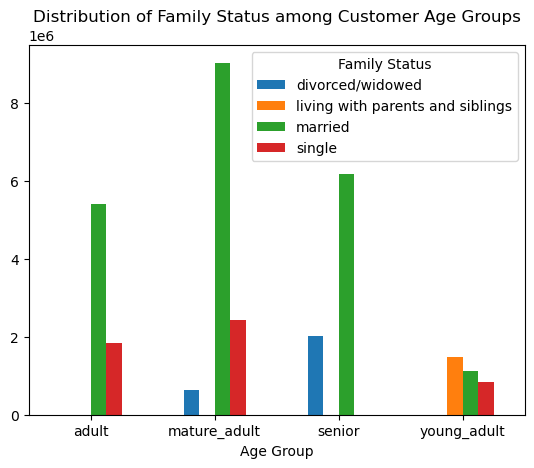

In [55]:
bar_agegroups_famstatus = crosstab_age_famstatus.plot.bar()
plt.title('Distribution of Family Status among Customer Age Groups')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Family Status')
bar_agegroups_famstatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroups_famstatus.png'))